### Introduction

- This analysis is based on the [COVID-19 Community Mobility Reports](https://www.google.com/covid19/mobility/index.html?hl=en) created by Google. The reports aim to provide insights into what has changed in response to policies aimed at combating COVID-19. The reports chart movement trends over time by geography, across different categories of places such as retail and recreation, groceries and pharmacies, parks, transit stations, workplaces, and residential.
- In order to run the analysis, make sure you download the [original dataset](https://www.google.com/covid19/mobility/index.html?hl=en) from Google and run all the code chunks in the `data_cleaning.ipynb` to create the cleaned dataframe that only focuses on the trend in the U.S
- In order to find the correlation between COVID cases and the mobility trend, I also combined it with the [COVID-19 dataset](https://github.com/nytimes/covid-19-data) from New York Times. There is also an interesting pattern of how people from different states are responding to the number of confirmed cases and deaths.
- The analysis can be found in the `data_analysis.ipynb` notebook. There is also a [Plotly Dash](https://plot.ly/dash) app built on top that. You can find how to run the app in the README file.

### Loading data

In [1]:
import pandas as pd
df = pd.read_csv('https://graderdata.s3.amazonaws.com/US_Mobility_Report.csv')

In [2]:
# Convert the date column to datetime type
df.date = pd.to_datetime(df.date, format='%Y-%m-%d')

In [3]:
df.head(10)

,state,county,date,retail,grocery,parks,transit,workplaces,residential
0,AL,Autauga County,2020-02-15,5.0,7.0,NaN,NaN,-4.0,NaN
1,AL,Autauga County,2020-02-16,0.0,1.0,-23.0,NaN,-4.0,NaN
2,AL,Autauga County,2020-02-17,8.0,0.0,NaN,NaN,-27.0,5.0
3,AL,Autauga County,2020-02-18,-2.0,0.0,NaN,NaN,2.0,0.0
4,AL,Autauga County,2020-02-19,-2.0,0.0,NaN,NaN,2.0,0.0
5,AL,Autauga County,2020-02-20,-8.0,-3.0,NaN,NaN,1.0,2.0
6,AL,Autauga County,2020-02-21,-3.0,-2.0,NaN,NaN,3.0,0.0
7,AL,Autauga County,2020-02-22,1.0,1.0,NaN,NaN,8.0,NaN
8,AL,Autauga County,2020-02-23,0.0,3.0,NaN,NaN,5.0,NaN
9,AL,Autauga County,2020-02-24,-2.0,-5.0,NaN,NaN,2.0,1.0


### What does the number stand for

- Changes for each day are compared to a baseline value for that day of the week:
 - The baseline is the median value, for the corresponding day of the week, during the 5-week period **Jan 3–Feb 6, 2020.**
 - The datasets show trends over several months with the most recent data representing approximately **2-3** days ago—this is how long it takes to produce the datasets.

### Place categories
- **Grocery & pharmacy**: Mobility trends for places like grocery markets, food warehouses, farmers markets, specialty food shops, drug stores, and pharmacies.
- **Parks**: Mobility trends for places like local parks, national parks, public beaches, marinas, dog parks, plazas, and public gardens.
- **Transit stations**: Mobility trends for places like public transport hubs such as subway, bus, and train stations.
- **Retail & recreation**: Mobility trends for places like restaurants, cafes, shopping centers, theme parks, museums, libraries, and movie theaters.
- **Residential**: Mobility trends for places of residence.
- **Workplaces**: Mobility trends for places of work.

### Now let's move on to the COVID data

In [4]:
covid_df = pd.read_csv('https://graderdata.s3.amazonaws.com/covid_cases.csv')
covid_df.head(10)

,date,state,cases,deaths
0,2020-01-21,WA,1,0
1,2020-01-22,WA,1,0
2,2020-01-23,WA,1,0
3,2020-01-24,IL,1,0
4,2020-01-24,WA,1,0
5,2020-01-25,CA,1,0
6,2020-01-25,IL,1,0
7,2020-01-25,WA,1,0
8,2020-01-26,AZ,1,0
9,2020-01-26,CA,2,0


In [5]:
# Convert the date column to datetime type 
covid_df.date = pd.to_datetime(covid_df.date, format='%Y-%m-%d')

### As a starter, let's only focus on the state level data

In [6]:
# Aggregate the data for each state  
final_df = df.groupby(['state', 'date']).mean().reset_index()

In [7]:
final_df.head(10)

,state,date,retail,grocery,parks,transit,workplaces,residential
0,AK,2020-02-15,6.571429,0.400000,11.0,2.333333,-0.800000,-0.333333
1,AK,2020-02-16,9.285714,4.000000,43.0,1.333333,0.800000,-1.333333
2,AK,2020-02-17,-0.428571,-2.000000,-2.0,1.666667,-31.166667,7.250000
3,AK,2020-02-18,-2.142857,-3.000000,-19.0,5.500000,0.000000,1.800000
4,AK,2020-02-19,-5.285714,-5.000000,-8.0,3.666667,0.200000,2.000000
5,AK,2020-02-20,0.142857,1.600000,-1.0,3.000000,3.800000,0.000000
6,AK,2020-02-21,-0.142857,-4.833333,-6.0,11.333333,5.400000,0.000000
7,AK,2020-02-22,6.285714,-1.000000,12.0,1.000000,2.400000,-1.000000
8,AK,2020-02-23,6.428571,3.200000,31.0,-3.000000,1.400000,-1.000000
9,AK,2020-02-24,0.142857,0.000000,-1.0,5.333333,3.100000,-0.400000


In [8]:
final_df = final_df.merge(covid_df, how="inner", on=['state', 'date'])

In [9]:
final_df.head(10)

,state,date,retail,grocery,parks,transit,workplaces,residential,cases,deaths
0,AK,2020-03-12,16.285714,18.800000,10.0,2.000000,-4.500000,1.600000,1,0
1,AK,2020-03-13,6.285714,16.666667,6.0,0.666667,-10.000000,3.250000,1,0
2,AK,2020-03-14,7.428571,17.600000,23.0,-2.333333,-3.500000,1.000000,1,0
3,AK,2020-03-15,8.714286,13.000000,62.0,-3.333333,-0.200000,0.666667,1,0
4,AK,2020-03-16,3.714286,16.400000,30.0,-7.333333,-9.800000,3.250000,3,0
5,AK,2020-03-17,-5.857143,7.400000,-1.0,-14.666667,-12.545455,6.500000,6,0
6,AK,2020-03-18,-13.285714,5.600000,5.0,-19.000000,-17.363636,9.500000,9,0
7,AK,2020-03-19,-26.500000,2.800000,-1.0,-20.333333,-20.000000,10.750000,12,0
8,AK,2020-03-20,-26.428571,-5.714286,24.0,-26.666667,-20.545455,12.250000,14,0
9,AK,2020-03-21,-31.142857,-6.666667,-10.0,-36.666667,-18.000000,9.000000,21,0


### dump the data for faster access from the app

In [10]:
final_df.to_pickle('app.data')

### Let's quickly "confirm" the COVID cases trend in each state

In [12]:
import plotly.express as px
state_df = final_df.loc[final_df.state=="FL"].copy()
fig = px.line(state_df, x='date', y='cases')
fig.show()

### Also "confirm" the mobility trend in each category

In [13]:
fig = px.line(state_df, x='date', y='retail')
fig.show()

In [ ]:
# Look at six different categories at the same time
fig = px.scatter(state_df, x="date", y=["retail", "grocery", "parks", "transit", "workplaces", "residential"])
fig.show()

### Let's take a look at what drives the number of COVID cases

In [16]:
state_df.corr()

,retail,grocery,parks,transit,workplaces,residential,cases,deaths,new_cases,new_deaths
retail,1.000000,0.843276,0.651810,0.896417,0.621951,-0.782309,0.540105,0.548337,-0.001569,-0.027406
grocery,0.843276,1.000000,0.590946,0.809746,0.497944,-0.576451,0.517076,0.512297,0.004365,-0.030703
parks,0.651810,0.590946,1.000000,0.655168,0.331751,-0.497225,0.199005,0.201926,-0.138249,-0.161820
transit,0.896417,0.809746,0.655168,1.000000,0.590020,-0.748443,0.606730,0.614149,-0.052302,-0.053500
workplaces,0.621951,0.497944,0.331751,0.590020,1.000000,-0.856950,0.295618,0.303044,-0.085966,-0.037731
residential,-0.782309,-0.576451,-0.497225,-0.748443,-0.856950,1.000000,-0.505061,-0.520597,0.028994,0.006633
cases,0.540105,0.517076,0.199005,0.606730,0.295618,-0.505061,1.000000,0.994172,0.160480,0.208924
deaths,0.548337,0.512297,0.201926,0.614149,0.303044,-0.520597,0.994172,1.000000,0.126635,0.186217
new_cases,-0.001569,0.004365,-0.138249,-0.052302,-0.085966,0.028994,0.160480,0.126635,1.000000,0.556572
new_deaths,-0.027406,-0.030703,-0.161820,-0.053500,-0.037731,0.006633,0.208924,0.186217,0.556572,1.000000


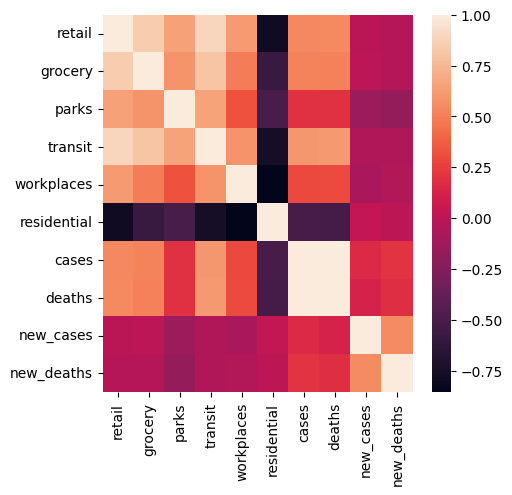

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize= (5,5), dpi=100)
sns.heatmap(state_df.corr())

### Another way to look at this data is to check how people from each state are reacting to the COVID number

In [20]:
# Calculate the daily new cases using the diff method
state_df['new_cases'] = final_df['cases'].diff()
state_df['new_deaths'] = final_df['deaths'].diff()

In [21]:
state_df.corr()

,retail,grocery,parks,transit,workplaces,residential,cases,deaths,new_cases,new_deaths
retail,1.000000,0.843276,0.651810,0.896417,0.621951,-0.782309,0.540105,0.548337,-0.001569,-0.027406
grocery,0.843276,1.000000,0.590946,0.809746,0.497944,-0.576451,0.517076,0.512297,0.004365,-0.030703
parks,0.651810,0.590946,1.000000,0.655168,0.331751,-0.497225,0.199005,0.201926,-0.138249,-0.161820
transit,0.896417,0.809746,0.655168,1.000000,0.590020,-0.748443,0.606730,0.614149,-0.052302,-0.053500
workplaces,0.621951,0.497944,0.331751,0.590020,1.000000,-0.856950,0.295618,0.303044,-0.085966,-0.037731
residential,-0.782309,-0.576451,-0.497225,-0.748443,-0.856950,1.000000,-0.505061,-0.520597,0.028994,0.006633
cases,0.540105,0.517076,0.199005,0.606730,0.295618,-0.505061,1.000000,0.994172,0.160480,0.208924
deaths,0.548337,0.512297,0.201926,0.614149,0.303044,-0.520597,0.994172,1.000000,0.126635,0.186217
new_cases,-0.001569,0.004365,-0.138249,-0.052302,-0.085966,0.028994,0.160480,0.126635,1.000000,0.556572
new_deaths,-0.027406,-0.030703,-0.161820,-0.053500,-0.037731,0.006633,0.208924,0.186217,0.556572,1.000000


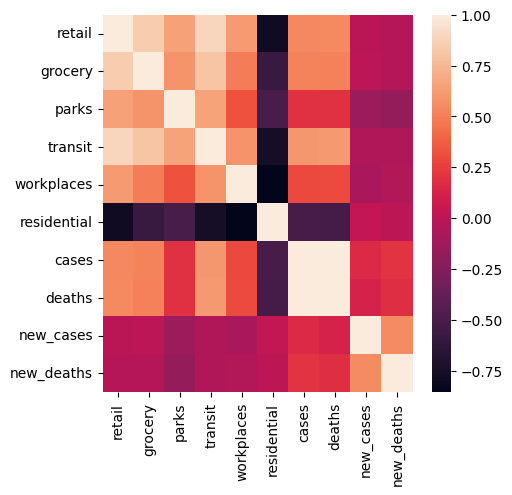

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize= (5,5), dpi=100)
sns.heatmap(state_df.corr())